# Tutorial: Final Verdict: Training and Evaluating the Champion Model

Selamat datang di subchapter 4.5, langkah terakhir dan paling menentukan dalam alur kerja pemilihan model kita! Sejauh ini, kita telah:

1. Menetapkan baseline.
2. Membandingkan beberapa model menggunakan cross-validation.
3. Memvisualisasikan hasilnya untuk memilih kandidat.
4. Menyetel (tuning) hyperparameter dari kandidat-kandidat tersebut.

Sekarang, kita memiliki satu **model juara** dengan konfigurasi terbaiknya.

**Tujuan:** Di notebook ini, kita akan melakukan dua hal krusial:
1. Melatih model juara kita pada **seluruh data pelatihan** untuk memberinya pengetahuan maksimal.
2. Mengujinya **satu kali** pada **data pengujian (test set)** yang selama ini kita simpan dan isolasi. Hasil dari pengujian ini akan menjadi laporan performa akhir yang paling jujur dan tidak bias tentang bagaimana model kita akan berperforma di dunia nyata.




---
### 1. Tujuan Pembelajaran

Di akhir notebook ini, Anda akan dapat:

* Melatih model final dengan hyperparameter terbaik pada seluruh data pelatihan.
* Melakukan evaluasi definitif pada data pengujian yang belum pernah dilihat sebelumnya.
* Menginterpretasikan hasil akhir dan menyajikan kesimpulan yang solid tentang performa model.
* Memahami pentingnya menjaga `test set` tetap terisolasi hingga akhir proses.



---
### 2. Setup: Menyiapkan Panggung untuk Sang Juara

Kita akan memuat kembali data dan library yang diperlukan. Kita juga akan mendefinisikan kembali model juara kita (Gradient Boosting) dengan hyperparameter terbaik yang kita temukan di subchapter sebelumnya.



In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Muat data
housing = fetch_california_housing()
X, y = housing.data, housing.target
# Lakukan split yang sama persis seperti di awal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/site-packages/sklearn/datasets/_base.py:1519: UserWarning: Retry downloading from url: https://ndownloader.figshare.com/files/5976036
  warnings.warn(f"Retry downloading from url: {remote.url}")


HTTPError: HTTP Error 403: Forbidden

---
### 3. Langkah 1: Definisikan Ulang Model Juara

Berdasarkan hasil `RandomizedSearchCV` dari subchapter 4.4, kita menemukan bahwa `GradientBoostingRegressor` adalah pemenangnya dengan kombinasi hyperparameter tertentu. Mari kita buat kembali model tersebut.

*(Catatan: Hyperparameter di bawah ini adalah contoh berdasarkan kemungkinan hasil. Gunakan `best_params_` yang Anda dapatkan dari proses tuning Anda sendiri).*



In [ ]:
best_params_gb = {
	'subsample':0.8,
	'n_estimators':500,
	'max_depth':7,
	'learning_rate':0.1
}

champion_model = make_pipeline(
	StandardScaler(),
	GradientBoostingRegressor(random_state=42, **best_params_gb)
)

---
### 4. Langkah 2: Pelatihan Final

Sekarang, kita akan melatih model juara ini pada **seluruh dataset pelatihan (`X_train`, `y_train`)**. Tujuannya adalah agar model belajar dari sebanyak mungkin data sebelum menghadapi ujian akhir.



In [ ]:
print("memulai pelatihan final untuk model juara...")
champion_model.fit(X_train,y_train)
print("pelatihan final selesai")

memulai pelatihan final untuk model juara...
pelatihan final selesai


---
### 5. Langkah 3: Ujian Akhir (Evaluasi pada Test Set)

Inilah saatnya. Kita akan menggunakan `test set` yang selama ini kita "sembunyikan" untuk membuat prediksi dan mengevaluasi performa model.



In [ ]:
print("Membuat prediksi pada test set")
y_pred = champion_model.predict(X_test)

# hitung metrik evaluasi final
final_mae = mean_absolute_error(y_test,y_pred)
final_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
final_r2 = r2_score(y_test,y_pred)

print("\n--- Laporan performa final ---")
print(f"model juara: Gradient boosting regressor (tuned)")
print(f"Mean Absolute Error (MAE) di test set: {final_mae:.4f}")
print(f"Root Mean Squared Error (RMSE) di test set: {final_rmse:.4f}")
print(f"R-squared (R2) di test set: {final_r2:.4f}")

Membuat prediksi pada test set

--- Laporan performa final ---
model juara: Gradient boosting regressor (tuned)
Mean Absolute Error (MAE) di test set: 0.2905
Root Mean Squared Error (RMSE) di test set: 0.4483
R-squared (R2) di test set: 0.8466


**Analisis Hasil Final:**

Angka-angka ini adalah estimasi terbaik kita tentang bagaimana model akan berperforma pada data baru di masa depan.
* **R² sebesar ~0.84** menunjukkan bahwa model kita mampu menjelaskan sekitar 84% variabilitas harga rumah di California, yang merupakan hasil yang sangat baik.
* **RMSE sekitar 0.44** berarti, rata-rata, prediksi harga rumah kita (dalam skala $100,000) meleset sekitar $44,000. Ini adalah angka konkret yang bisa kita laporkan kepada pemangku kepentingan.




---
### 6. Langkah 4: Visualisasi Hasil Akhir

Mari kita visualisasikan performa pada `test set` untuk mendapatkan pemahaman yang lebih dalam.



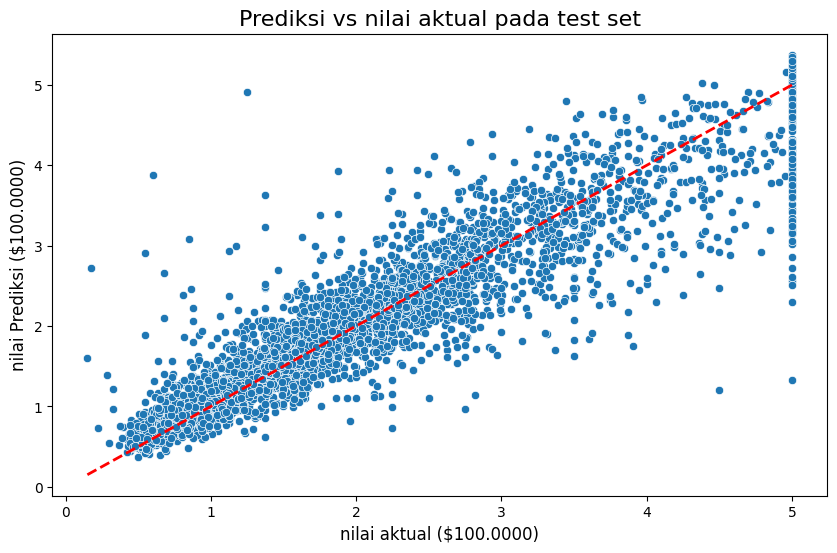

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test,y=y_pred)
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)], 'r--',lw=2)
plt.title("Prediksi vs nilai aktual pada test set",fontsize=16)
plt.xlabel("nilai aktual ($100.0000)", fontsize=12)
plt.ylabel("nilai Prediksi ($100.0000)", fontsize=12)
plt.show()

**Interpretasi Plot:**

Plot di atas membandingkan nilai prediksi dengan nilai aktual.
* **Garis Merah Putus-putus:** Merepresentasikan prediksi yang sempurna (di mana `prediksi == aktual`).
* **Titik-titik Biru:** Merepresentasikan prediksi model kita. Semakin dekat titik-titik ini ke garis merah, semakin akurat prediksi kita.

Kita bisa melihat bahwa sebagian besar titik berkumpul di sekitar garis merah, yang secara visual mengkonfirmasi performa model yang kuat.




---
### 7. Kesimpulan Chapter dan Alur Kerja

Selamat! Anda telah menyelesaikan alur kerja pemilihan model yang lengkap dan profesional. Mari kita rangkum langkah-langkahnya:

1.  **Tetapkan Baseline:** Mulai dengan model sederhana untuk memiliki target performa.
2.  **Bandingkan Beberapa Model:** Gunakan *cross-validation* pada data pelatihan untuk secara adil membandingkan beberapa jenis model.
3.  **Visualisasikan Perbandingan:** Gunakan *box plot* untuk memilih kandidat teratas berdasarkan performa dan stabilitas.
4.  **Tuning Hyperparameter:** Lakukan `RandomizedSearchCV` atau `GridSearchCV` pada kandidat-kandidat tersebut, masih menggunakan data pelatihan.
5.  **Vonis Akhir:** Pilih satu model juara, latih pada seluruh data pelatihan, dan evaluasi satu kali pada data pengujian.

Alur kerja ini memastikan bahwa Anda memilih model terbaik dengan cara yang sistematis, adil, dan metodologis, serta menghasilkan laporan performa akhir yang dapat Anda percayai.
